In [12]:
import sys
sys.path.append('/fsx/matzeni/duck')

In [69]:
import torch
from einops import rearrange, repeat
from duck.box_tensors import BoxTensor
from matplotlib import pyplot as plt

In [93]:
# plt.style.use('seaborn')
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'medium'
plt.rcParams['ytick.labelsize'] = 'medium'
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = "#dbdbdb"
colors = ["#4fbfff", "#8cff92", "#ff976e"]

In [94]:
def make_box(box_width):
    dim = 1
    bsz = 1
    v1 = -(box_width / 2) * torch.ones((bsz, dim))
    v2 = +(box_width / 2) * torch.ones((bsz, dim))
    box = BoxTensor((v1, v2))
    return box

In [105]:
def boxe_dist(entity, box):
    width = box.right - box.left
    widthp1 = width + 1
    dist = torch.abs(entity - box.center) / widthp1
    outside_mask = (entity < box.left) | (entity > box.right)
    kappa = 0.5 * width * (widthp1 - (1 / widthp1))
    dist_outside = torch.abs(entity - box.center) * widthp1 - kappa
    dist[outside_mask] = dist_outside[outside_mask]
    return dist

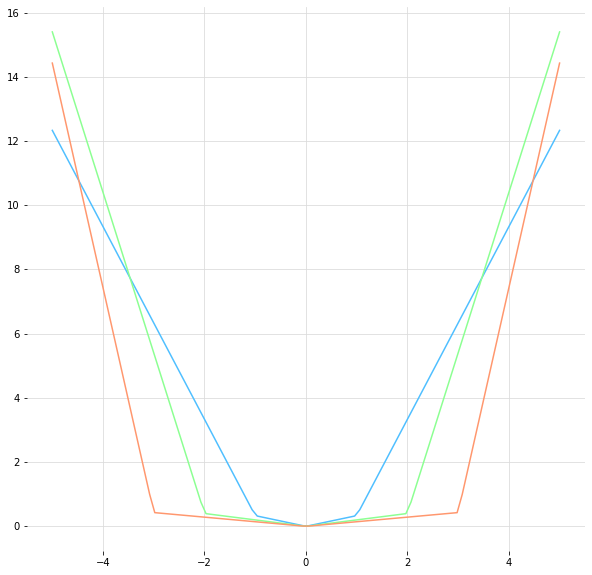

In [107]:
x = torch.linspace(-5, 5, steps=100)
plt.figure(figsize=(10, 10))
box_widths = [2, 4, 6]
for i, box_width in enumerate(box_widths):
    box = make_box(box_width)
    plt.plot(x, boxe_dist(x, box).squeeze(0), color=colors[i])
plt.show()